In [2]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [3]:
place = 'Kyiv, Ukraine'
local_crs = 5514

## start of POC

In [4]:
gdf = osmnx.features.features_from_place(place, tags={'building': True})
gdf = gdf[gdf.geom_type == "Polygon"].reset_index(drop=True)
gdf_projected = osmnx.projection.project_gdf(gdf)

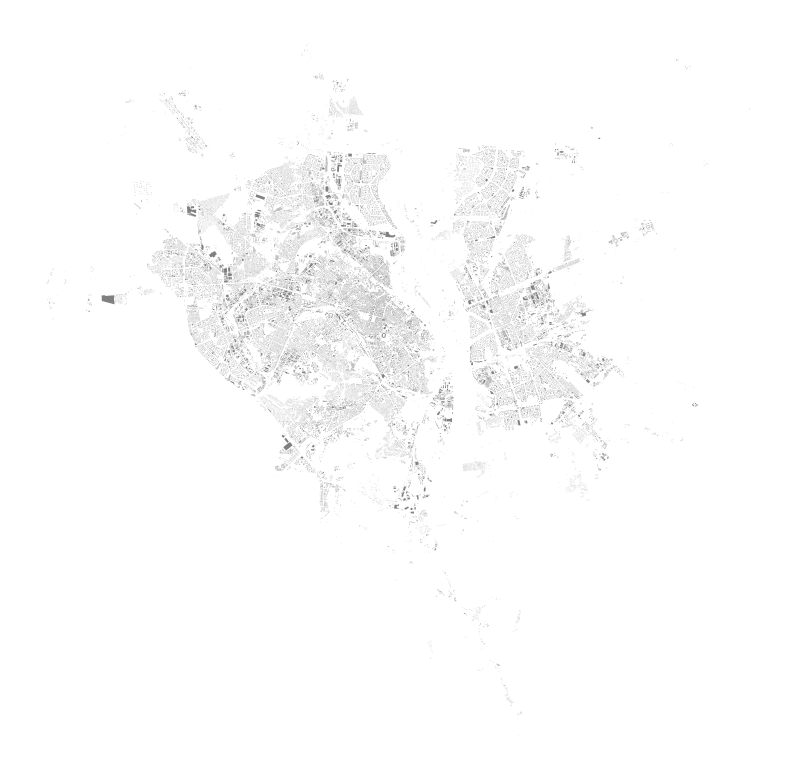

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
gdf_projected.plot(ax=ax, color="grey")
ax.set_axis_off()
plt.show()

In [4]:
len(gdf_projected)

89316

In [5]:
buildings = momepy.preprocess(gdf_projected.reset_index(), size=100,
                              compactness=0.2, islands=True)

Loop 1 out of 2.


Identifying changes:   0%|          | 0/89316 [00:00<?, ?it/s]

Changing geometry:   0%|          | 0/2185 [00:00<?, ?it/s]

Loop 2 out of 2.


Identifying changes:   0%|          | 0/59717 [00:00<?, ?it/s]

Changing geometry:   0%|          | 0/269 [00:00<?, ?it/s]

In [6]:
buildings_preprocessed = buildings[["geometry"]].to_crs(local_crs)
buildings_preprocessed['uID'] = momepy.unique_id(buildings_preprocessed)

NameError: name 'buildings_preprocessed' is not defined

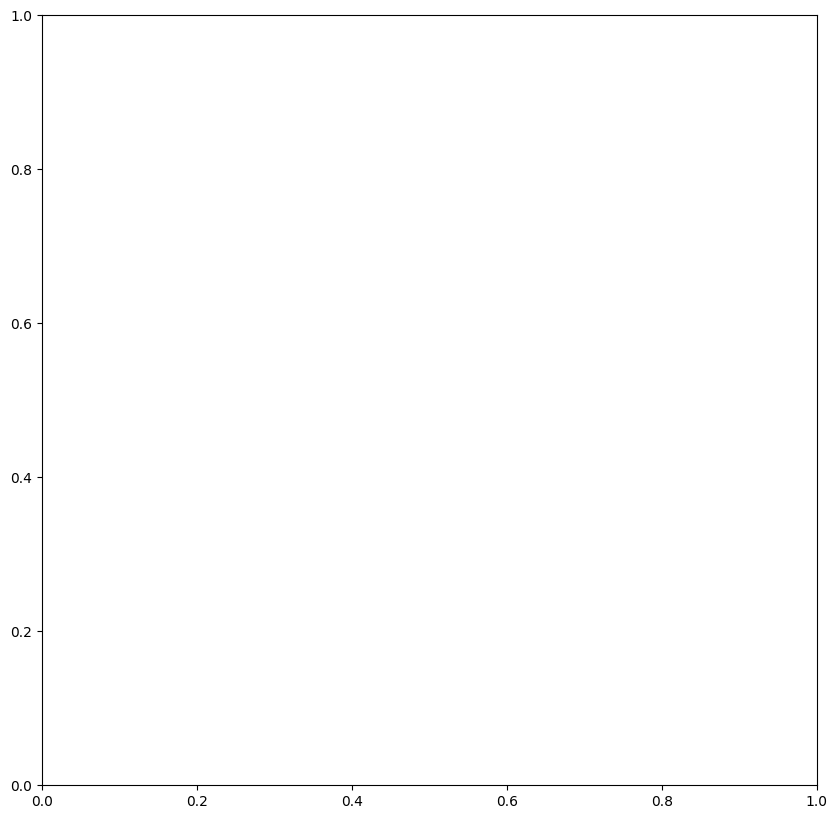

In [6]:
f, ax = plt.subplots(figsize=(10, 10))
buildings_preprocessed.plot(ax=ax, color="grey")
ax.set_axis_off()
plt.show()

In [8]:
buildings_preprocessed.to_file("../data/buildings_preprocessed.gpkg", driver='GPKG', layer="buildings")

## end of POC

In [ ]:
buildings = osmnx.features.features_from_place(place, tags={'building': True})
buildings.head()

In [6]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)
buildings.head()

,name,name:uk,operator,railway,ref,wheelchair,geometry,entrance,man_made,amenity,...,toilets:handwashing,addr:block,playground,size,levels,ways,abandoned:shop,website_1,ref:edbo,payment:discover_card
0,Льодовий стадіон,Льодовий стадіон,NaN,NaN,NaN,NaN,"POLYGON ((30.46587 50.37400, 30.46697 50.37331...",NaN,NaN,ice_rink,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.62538 50.43625, 30.62555 50.43629...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.62585 50.43546, 30.62601 50.43550...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ЖРЕО-417,ЖРЕО-417,NaN,NaN,NaN,NaN,"POLYGON ((30.62573 50.43636, 30.62629 50.43650...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.62650 50.43652, 30.62667 50.43656...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
%time check = momepy.CheckTessellationInput(buildings)

Collapsed features  : 0
Split features      : 38
Overlapping features: 186
CPU times: user 3.5 s, sys: 114 ms, total: 3.62 s
Wall time: 3.62 s


In [12]:
buildings = buildings[["geometry"]].to_crs(local_crs)

In [13]:
buildings["uID"] = range(len(buildings))
buildings.head()

,geometry,uID
0,"POLYGON ((400715.451 -1047066.528, 400798.992 ...",0
1,"POLYGON ((411512.314 -1039314.466, 411523.660 ...",1
2,"POLYGON ((411551.985 -1039399.946, 411563.241 ...",2
3,"POLYGON ((411535.943 -1039300.928, 411574.307 ...",3
4,"POLYGON ((411589.050 -1039278.554, 411600.700 ...",4


In [14]:
%time check = momepy.CheckTessellationInput(buildings)

Collapsed features  : 3
Split features      : 41
Overlapping features: 198
CPU times: user 5.71 s, sys: 73.4 ms, total: 5.79 s
Wall time: 5.79 s


In [15]:
%time buildings = buildings.drop(check.collapse.index.union(check.overlap.index).union(check.split.index))

CPU times: user 13.8 ms, sys: 1.49 ms, total: 15.3 ms
Wall time: 13.7 ms


<Axes: >

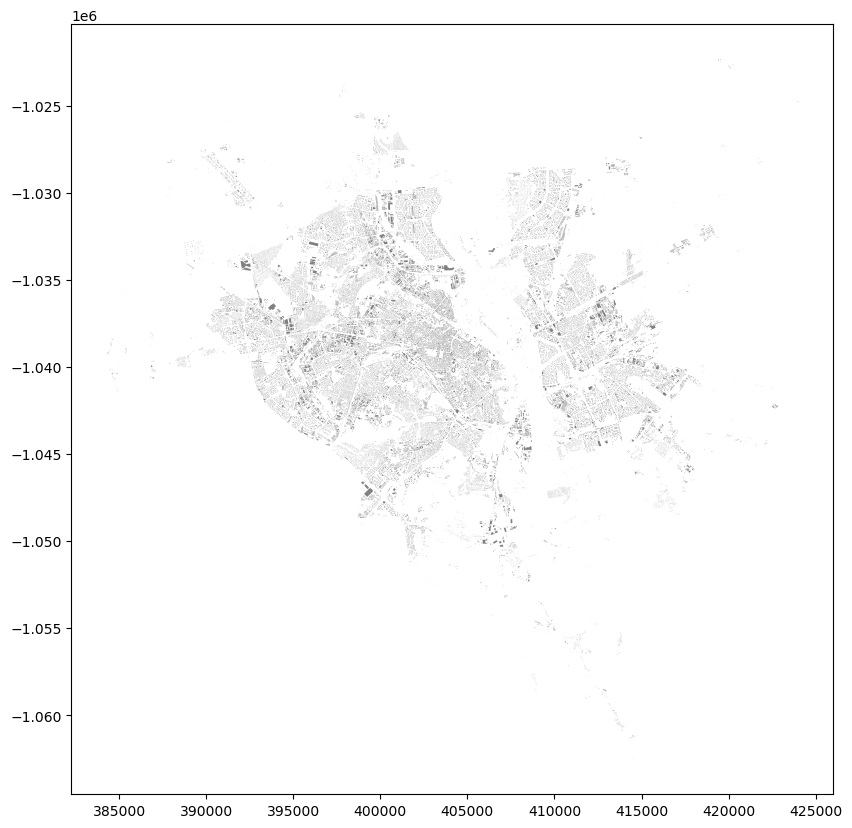

In [16]:
buildings.plot(figsize=(10,10), color='grey')

In [17]:
buildings.to_file("../data/buildings.gpkg", driver='GPKG', layer="buildings")